<a href="https://colab.research.google.com/github/sujeongzoe/KDT/blob/main/%5BHeartAttack%5DTuning_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Heart Attack

## heart_칼럼


1. age - 나이


2. sex - 성별 (1 = 남성, 0 = 여성)


3. cp - 가슴 통증(chest pain) (0 = 무증상, 1 = 일반 협심증, 2 = 비정형 협심증, 3 = 비혈관 통증)


4. trtbps - 휴식 혈압 (병원 입원 시 mmHg 단위)


5. chol - BMI 센서를 통해 유입된 혈청 콜레스테롤(mg/dl)


6. fbs - 공복 혈당 > 120mg/dl (1 = 참, 0 = 거짓)


7. restecg - 휴식 심전도 결과
   #(0 = 정상,
   #1 = ST-T파 이상 (T파 반전 및 또는 0.05mV 이상의 ST 상승 또는 감소),
   #2 = Estes 기준에 의해 좌심실 비대증 가능성 또는 유력)


8. thalachh - 최대 심장 박동수


9. exng - 운동으로 인한 협심증 (1 = 예, 0 = 아니오)


10. oldpeak - 휴식 대비 운동으로 인한 ST 감소


11. slp - 최대 운동 ST 세그먼트 기울기(0 = 하향경사, 1 = 평탄, 2 = 상향경사)


12. caa - 형광 투시법(혈관조형술)에 의해 착색된 주요 혈관(0-3)의 수


13. thall - 탈륨 스트레스 테스트 1 = 고정 결함, 2 = 정상, 3 = 가역 결함


14. output - 예측 속성 - 심장 질환 진단(조영술 질환 상태)
   #(0 = < 심장마비 발생 확률 감소, 1 = > 심장마비 발생 확률 증가)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import recall_score, precision_score, roc_curve, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/KDT_python/project/230419-230426/heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
cat = ['sex','cp','fbs','restecg','exng','slp','caa','thall']
cont = ['age','trtbps','chol','thalachh','oldpeak']

In [ ]:
print(len(cat), len(cont))

8 5


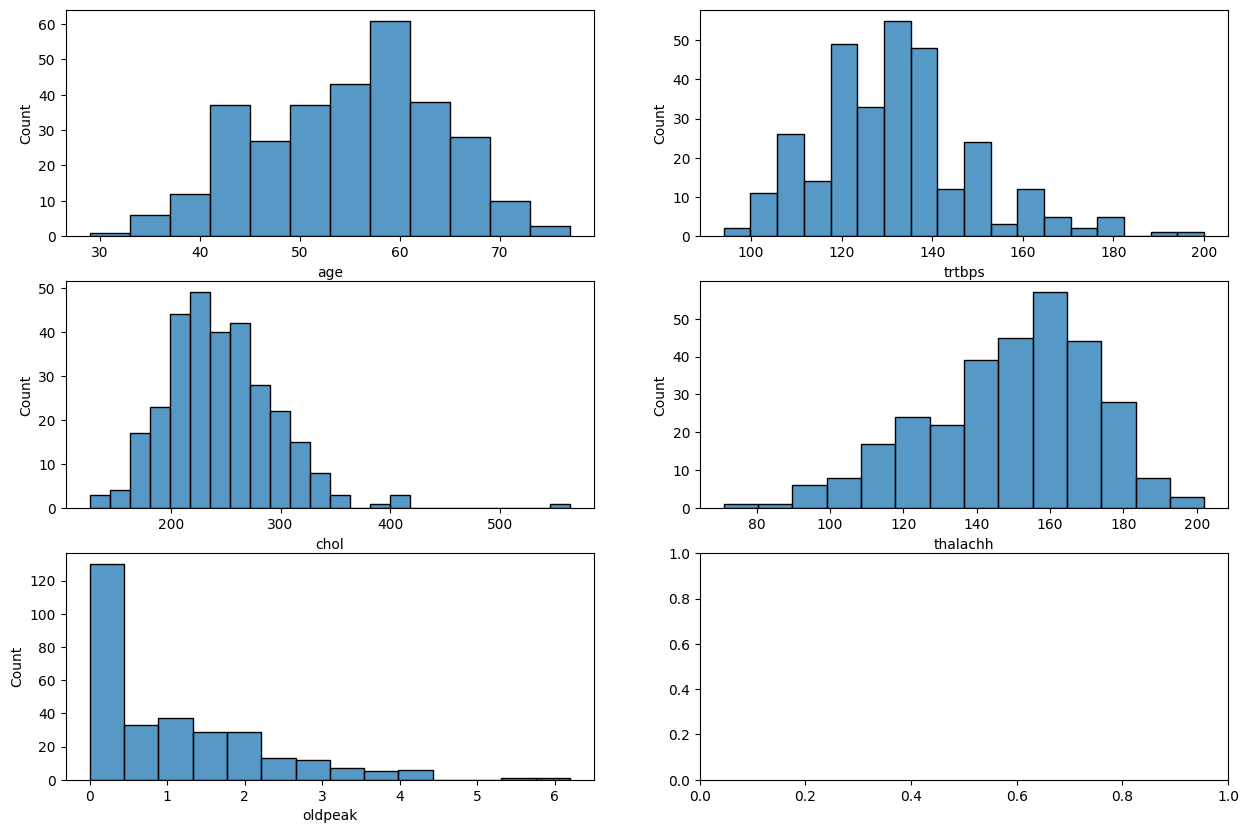

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,10))

for i, feature in enumerate(cont):
  row = int(i/2)
  col = i%2
  sns.histplot(x=feature,data=data, ax=ax[row][col])

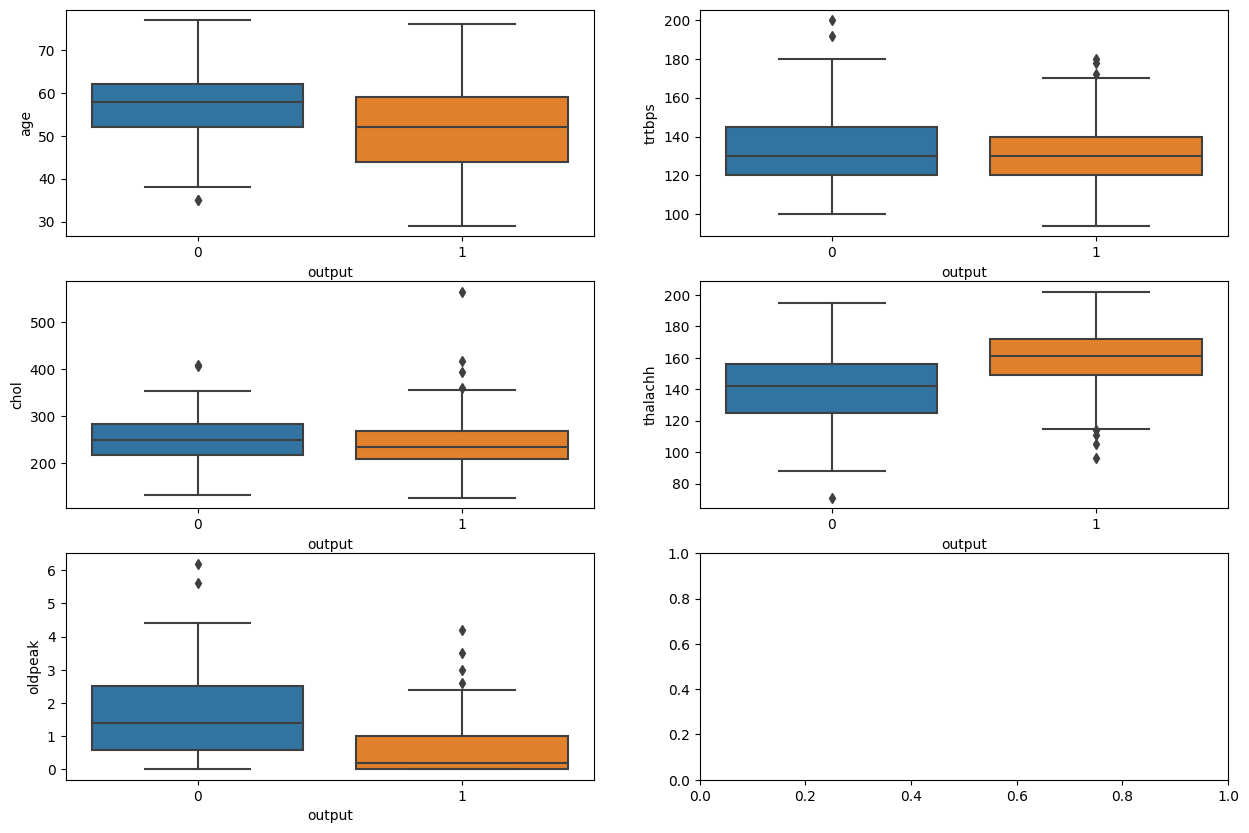

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,10))

for i, feature in enumerate(cont):
  row = int(i/2)
  col = i%2
  sns.boxplot(x='output', y=feature, data=data, ax=ax[row][col])

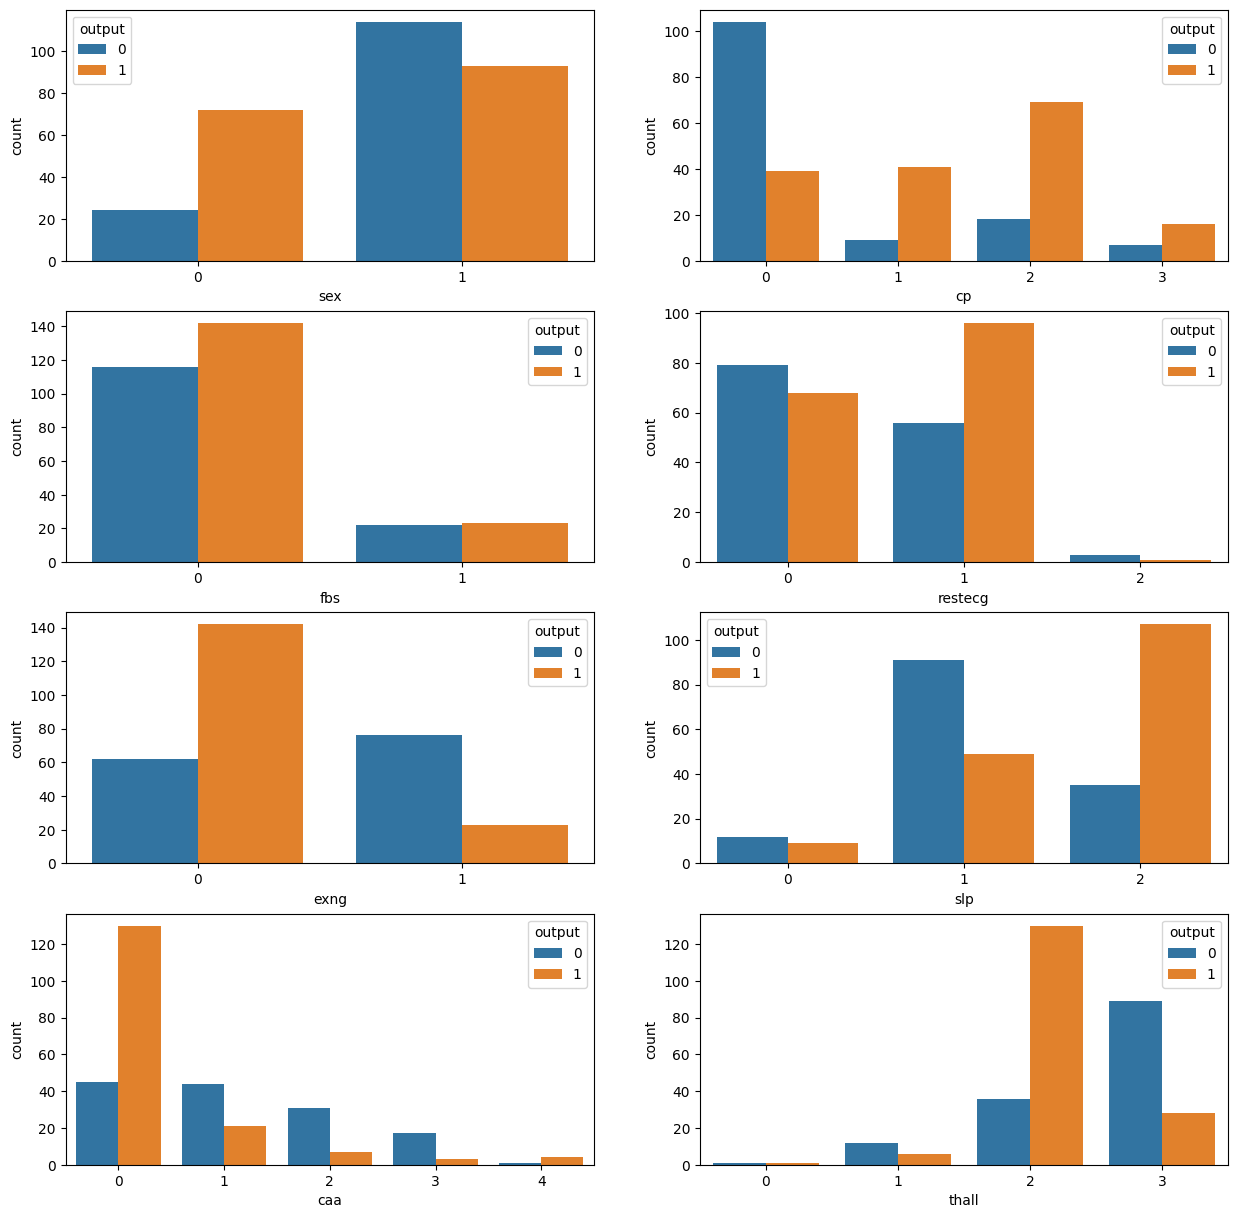

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(15,15))

for i, feature in enumerate(cat):
  row = int(i/2)
  col = i%2
  sns.countplot(x=feature,data=data, ax=ax[row][col], hue='output')

<Axes: xlabel='trtbps', ylabel='Count'>

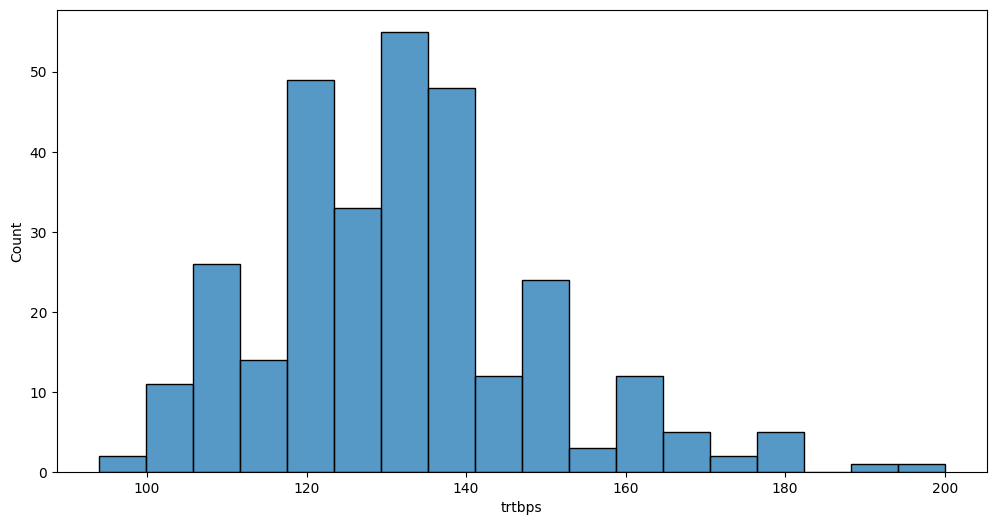

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='trtbps',data=data)

<Axes: xlabel='chol', ylabel='Count'>

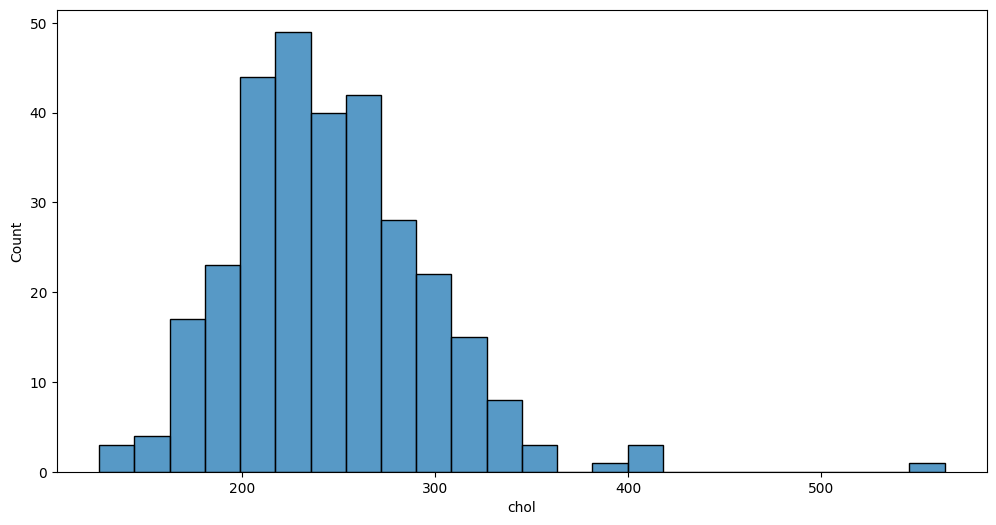

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='chol',data=data)

In [ ]:
data['caa'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

In [ ]:
data['thall'].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

# 데이터 전처리

In [ ]:
print(data.shape)
data.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data[np.abs(data['trtbps'] - data['trtbps'].mean()) > (3*data['trtbps'].std())]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [ ]:
data[np.abs(data['chol'] - data['chol'].mean()) > (3*data['chol'].std())]    # 보수적으로 선택.

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [ ]:
# ‘trtbps’ 3-sigma 이상인 행 -> 드랍
print(data.shape)
idx = data[data['trtbps']>=192].index
data = data.drop(idx)
print(data.shape)

(303, 14)
(301, 14)


In [ ]:
#‘chol’ 500 이상인 행 -> 드랍(3-sigma 이상인 행이 많아서 보수적으로 선택.)
print(data.shape)
idx = data[data['chol']>500].index
data = data.drop(idx)
print(data.shape)

(301, 14)
(300, 14)


In [ ]:
#  ‘caa’ number of major vessels (0-3)인데 caa==4인 행 -> 4와 가까운 3으로 변경
print(data['caa'].value_counts())
data.loc[data['caa']>3, 'caa'] = 3
print(data['caa'].value_counts())

0    174
1     64
2     37
3     20
4      5
Name: caa, dtype: int64
0    174
1     64
2     37
3     25
Name: caa, dtype: int64


In [ ]:
# ‘thall’ thall ==0 인 행 -> 0과 가까운 1로 변경
print(data['thall'].value_counts())
data.loc[data['thall']<1, 'thall'] = 1
print(data['thall'].value_counts())

2    166
3    114
1     18
0      2
Name: thall, dtype: int64
2    166
3    114
1     20
Name: thall, dtype: int64


In [ ]:
data1 = data
print(data1.shape)

(300, 14)


<Axes: >

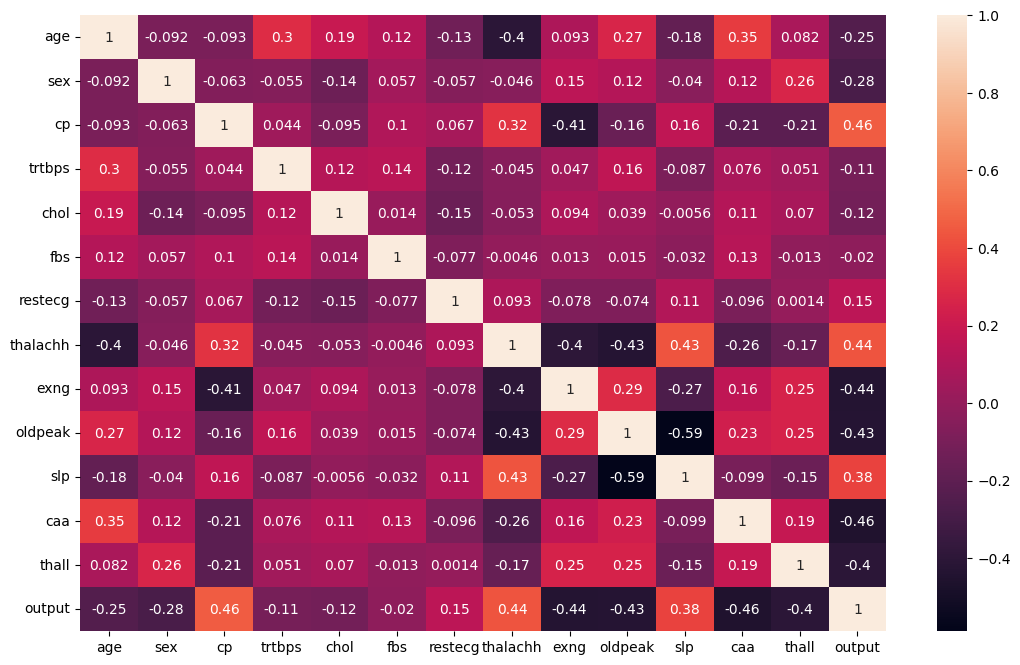

In [ ]:
fig, ax=plt.subplots(1,1, figsize=(13,8))
sns.heatmap(data.corr(method='spearman'), annot=True)

<Axes: >

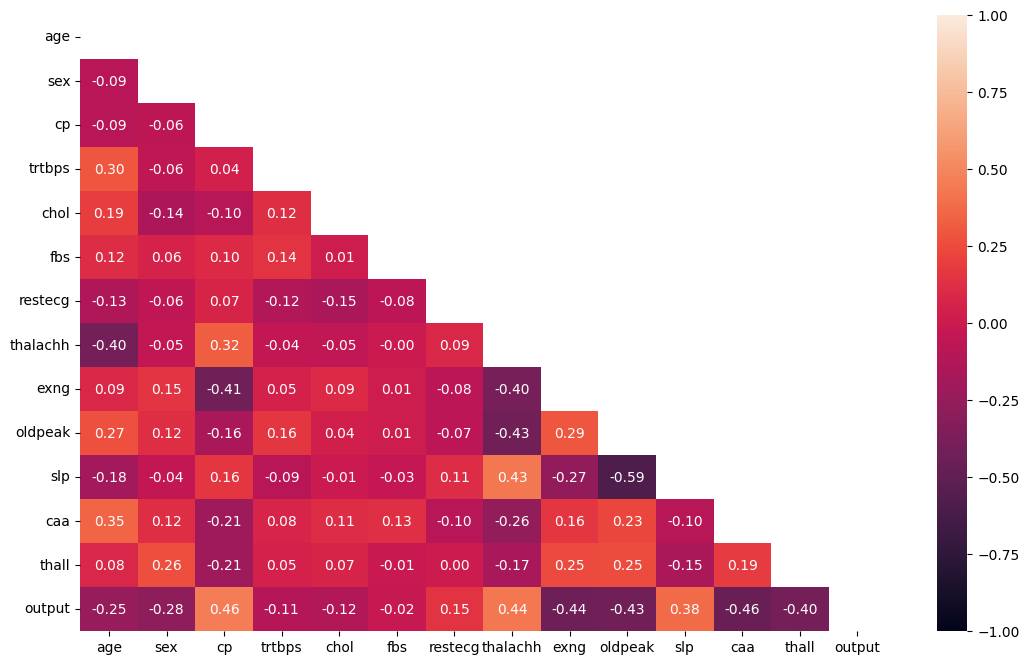

In [ ]:
df_corr = data.corr(method='spearman')

fig, ax=plt.subplots(1,1, figsize=(13,8))

# 하삼각
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

sns.heatmap(df_corr, fmt=".2f", annot=True,
            mask=mask, vmin = -1, vmax = 1)

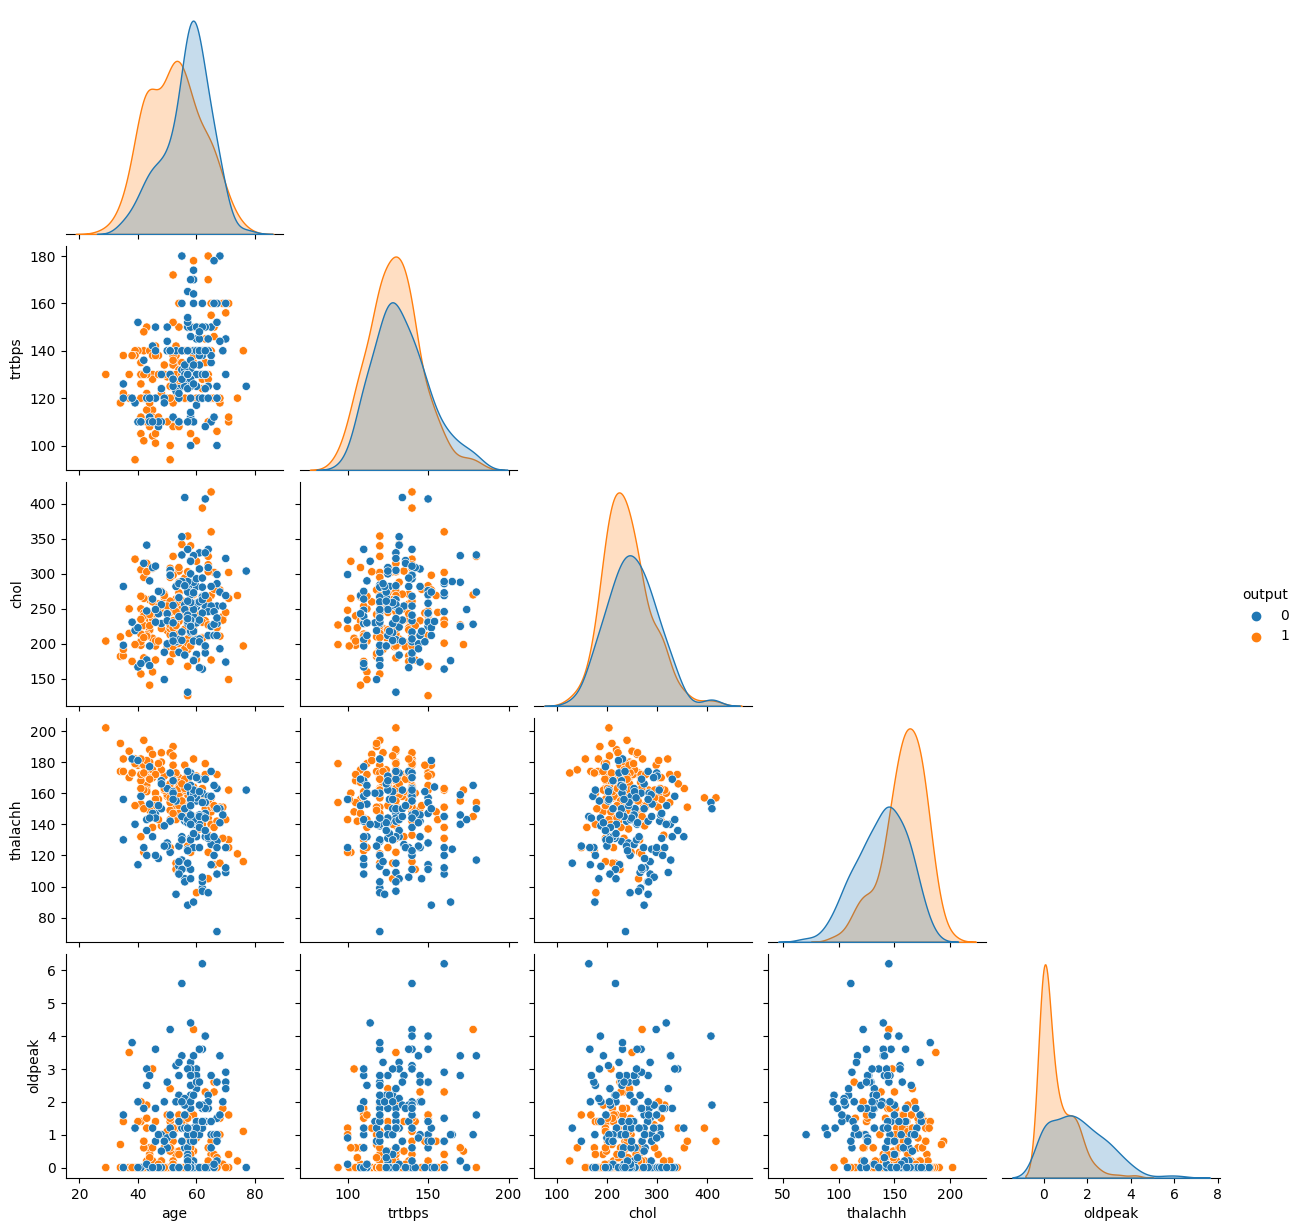

In [ ]:
sns.pairplot(data=data,hue='output',x_vars=cont,y_vars=cont,kind="scatter",corner=True)

# LGBMClassifier

작은 데이터 세트에 사용하는 것은 추천되지 않음. 과적합에 민감하고 작은 데이터에 대해 과적합 하기 쉽다.
행의 수가 10000이상의 행에 사용하는 것을 권장.

In [ ]:
df = data1

from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=419)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(225, 13) (225,) (75, 13) (75,)


boosting : 실행하고자 하는 알고리즘 타입을 정의합니다. 디폴트값은 gdbt 입니다.

- gdbt : Traditional Gradient Boosting Decision Tree
- rf : Random Forest
- dart : Dropouts meet Multiple Additive Regression Trees
- goss : Gradient-based One-Side Sampling

In [ ]:
lgbm = LGBMClassifier(num_leaves=31,
                      objective='binary',
                      learning_rate=0.2, n_estimators=50,
                      subsample=0.8,
                      # verbose=0,
                      n_jobs=-1,
                      # metric = 'binary_logloss',
                      # boosting='gdbt',
                      # 'rf'.'dart', 'goss'
                      random_state=419
                      )

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
score = accuracy_score(y_pred, y_test)
print('점수: ' + str(score))
print('RMSE: ', MSE(y_test, y_pred)**0.5)

점수: 0.7733333333333333
RMSE:  0.4760952285695233


In [ ]:
scores = cross_val_score(lgbm, X, y, cv=5)
print('정확도: ', np.round(scores, 2))
print('정확도 평균 : %0.2f' %(scores.mean()))

정확도:  [0.83 0.87 0.8  0.73 0.77]
정확도 평균 : 0.80


In [ ]:
def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)

    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, y_pred)
print(classification_report(y_test, y_pred))

오차 행렬
[[23 11]
 [ 6 35]]
정확도: 0.7733, 정밀도: 0.7609, 재현율: 0.8537,F1: 0.8046, AUC: 0.7651
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        34
           1       0.76      0.85      0.80        41

    accuracy                           0.77        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.78      0.77      0.77        75



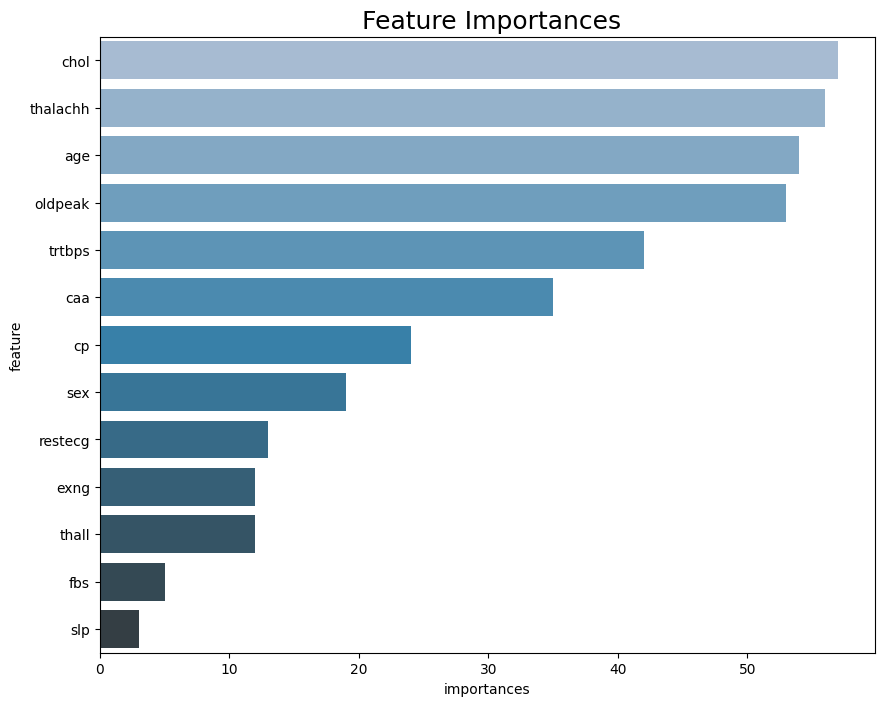

In [ ]:
importance = lgbm.feature_importances_
feature = X_train.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature',palette='PuBu_d',data=importances)
plt.title(' Feature Importances', fontsize=18)
plt.show()

In [ ]:
!pip install shap

import skimage
skimage.__version__

!pip install --upgrade scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 22.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 86.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 15.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.

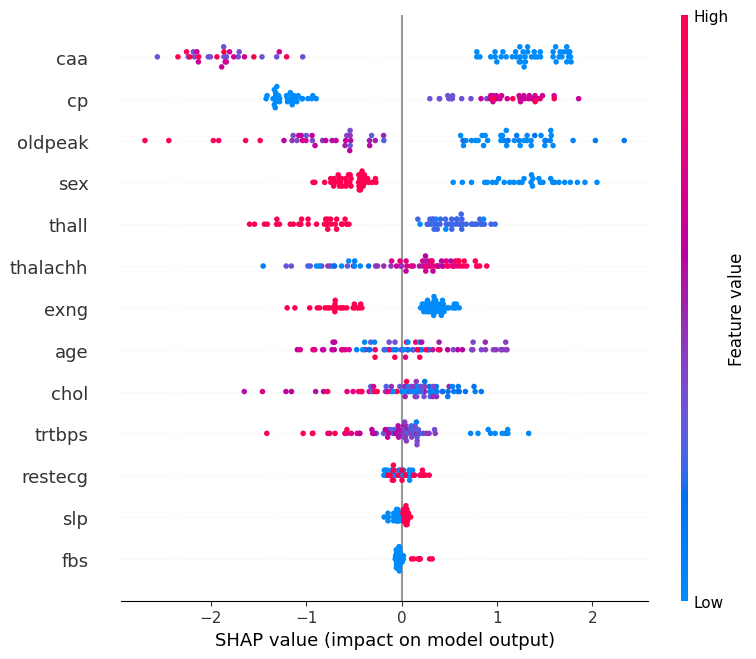

In [ ]:
import shap
explainer = shap.TreeExplainer(lgbm)   # Tree model shap value 객체 지정
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test)

## hyperparameter tuning

# optuna
- ML알고리즘의 하이퍼파라미터 튜닝을 자동화해주는 오픈소스 툴. (**AutoML**)
- 빠르게 튜닝이 가능하다.
- 직관적이다.
- 범용성을 가지고 있다.
- Study의 목적은 여러 번의 Trial을 거쳐 최적의 하이퍼파라미터 조합을 찾는다.
 - Study : 목적 함수에 기반한 최적화.(최적화를 하는 과정)
 - Trial : 목적함수 시행 (다양한 조합으로 목적함수를 시행하는 횟수를 의미)

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.3 MB/s eta 0:00:00


In [ ]:
import optuna
from functools import partial

def objective(trial, x=X, y=y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=419)

  param = {"objective": "binary",
           "metric": "binary_logloss",
           "verbosity": -1,
           "boosting_type": "gbdt",
           "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
           "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
           "num_leaves": trial.suggest_int("num_leaves", 2, 256),
           "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
           "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
           "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
           "min_child_samples": trial.suggest_int("min_child_samples", 5, 100)}

  model = LGBMClassifier(**param)

  model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)

  preds = model.predict(X_test)

  rmse = MSE(y_test, preds,squared=False)

  return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-04-22 08:16:26,167] A new study created in memory with name: no-name-7a7e708b-95aa-4813-ad59-37e08b1a664b
[I 2023-04-22 08:16:26,214] Trial 0 finished with value: 0.5 and parameters: {'lambda_l1': 1.6903167812199484e-07, 'lambda_l2': 0.15372563296868055, 'num_leaves': 102, 'feature_fraction': 0.6495372283978313, 'bagging_fraction': 0.439523566262359, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 0 with value: 0.5.
[I 2023-04-22 08:16:26,238] Trial 1 finished with value: 0.4472135954999579 and parameters: {'lambda_l1': 0.020894723521869947, 'lambda_l2': 0.009087178316835918, 'num_leaves': 118, 'feature_fraction': 0.6145866452703541, 'bagging_fraction': 0.8917305443217014, 'bagging_freq': 2, 'min_child_samples': 75}. Best is trial 1 with value: 0.4472135954999579.
[I 2023-04-22 08:16:26,259] Trial 2 finished with value: 0.6055300708194983 and parameters: {'lambda_l1': 3.0957401635344897, 'lambda_l2': 0.03638549811794773, 'num_leaves': 160, 'feature_fraction': 0.93934

[LightGBM] [Warning] feature_fraction is set=0.6495372283978313, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6495372283978313
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=0.15372563296868055, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.15372563296868055
[LightGBM] [Warning] bagging_fraction is set=0.439523566262359, subsample=1.0 will be ignored. Current value: bagging_fraction=0.439523566262359
[LightGBM] [Warning] lambda_l1 is set=1.6903167812199484e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.6903167812199484e-07
[LightGBM] [Warning] feature_fraction is set=0.6145866452703541, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6145866452703541
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=0.00908717831683

[I 2023-04-22 08:16:26,435] Trial 6 finished with value: 0.4654746681256314 and parameters: {'lambda_l1': 5.016499286901882e-06, 'lambda_l2': 0.008141240706724288, 'num_leaves': 148, 'feature_fraction': 0.8100963302478588, 'bagging_fraction': 0.6847378636669685, 'bagging_freq': 1, 'min_child_samples': 52}. Best is trial 3 with value: 0.408248290463863.
[I 2023-04-22 08:16:26,499] Trial 7 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 3.622040970663542e-08, 'lambda_l2': 0.006034123676456943, 'num_leaves': 132, 'feature_fraction': 0.9464242346340612, 'bagging_fraction': 0.551026220445108, 'bagging_freq': 7, 'min_child_samples': 58}. Best is trial 3 with value: 0.408248290463863.
[I 2023-04-22 08:16:26,548] Trial 8 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.174886526803922, 'lambda_l2': 3.075033333345935e-07, 'num_leaves': 194, 'feature_fraction': 0.8097525397268828, 'bagging_fraction': 0.7253035966733766, 'bagging_freq': 5, 'min_child_s

[LightGBM] [Warning] feature_fraction is set=0.9464242346340612, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9464242346340612
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] lambda_l2 is set=0.006034123676456943, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006034123676456943
[LightGBM] [Warning] bagging_fraction is set=0.551026220445108, subsample=1.0 will be ignored. Current value: bagging_fraction=0.551026220445108
[LightGBM] [Warning] lambda_l1 is set=3.622040970663542e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.622040970663542e-08
[LightGBM] [Warning] feature_fraction is set=0.8097525397268828, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8097525397268828
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=3.07503333334593

[I 2023-04-22 08:16:26,770] Trial 10 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 0.0018333645647456204, 'lambda_l2': 1.017682355738258e-08, 'num_leaves': 33, 'feature_fraction': 0.40586307372062397, 'bagging_fraction': 0.6205223477041626, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 3 with value: 0.408248290463863.
[I 2023-04-22 08:16:26,872] Trial 11 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 0.003928654155277749, 'lambda_l2': 1.9222297936795365e-08, 'num_leaves': 7, 'feature_fraction': 0.4140020768634681, 'bagging_fraction': 0.635885166540441, 'bagging_freq': 3, 'min_child_samples': 5}. Best is trial 3 with value: 0.408248290463863.


[LightGBM] [Warning] feature_fraction is set=0.40586307372062397, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40586307372062397
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.017682355738258e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.017682355738258e-08
[LightGBM] [Warning] bagging_fraction is set=0.6205223477041626, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6205223477041626
[LightGBM] [Warning] lambda_l1 is set=0.0018333645647456204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018333645647456204
[LightGBM] [Warning] feature_fraction is set=0.4140020768634681, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4140020768634681
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.92222979

[I 2023-04-22 08:16:27,132] Trial 12 finished with value: 0.4472135954999579 and parameters: {'lambda_l1': 1.5982532989791608e-06, 'lambda_l2': 1.4694586793801643e-05, 'num_leaves': 61, 'feature_fraction': 0.5363578160294769, 'bagging_fraction': 0.6165346602743852, 'bagging_freq': 4, 'min_child_samples': 5}. Best is trial 3 with value: 0.408248290463863.


[LightGBM] [Warning] feature_fraction is set=0.5363578160294769, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5363578160294769
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.4694586793801643e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4694586793801643e-05
[LightGBM] [Warning] bagging_fraction is set=0.6165346602743852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6165346602743852
[LightGBM] [Warning] lambda_l1 is set=1.5982532989791608e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.5982532989791608e-06
[LightGBM] [Warning] feature_fraction is set=0.4000747849512066, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4000747849512066
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.960449

[I 2023-04-22 08:16:28,026] Trial 13 finished with value: 0.3872983346207417 and parameters: {'lambda_l1': 0.00019295067004640484, 'lambda_l2': 2.960449721198947e-08, 'num_leaves': 65, 'feature_fraction': 0.4000747849512066, 'bagging_fraction': 0.7911622652772475, 'bagging_freq': 3, 'min_child_samples': 25}. Best is trial 13 with value: 0.3872983346207417.
[I 2023-04-22 08:16:28,207] Trial 14 finished with value: 0.4472135954999579 and parameters: {'lambda_l1': 0.0002496645610193399, 'lambda_l2': 6.295777547982436e-07, 'num_leaves': 82, 'feature_fraction': 0.5298189741617267, 'bagging_fraction': 0.8067302348074435, 'bagging_freq': 3, 'min_child_samples': 26}. Best is trial 13 with value: 0.3872983346207417.


[LightGBM] [Warning] feature_fraction is set=0.5298189741617267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5298189741617267
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.295777547982436e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.295777547982436e-07
[LightGBM] [Warning] bagging_fraction is set=0.8067302348074435, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8067302348074435
[LightGBM] [Warning] lambda_l1 is set=0.0002496645610193399, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002496645610193399
[LightGBM] [Warning] feature_fraction is set=0.7246715409583235, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7246715409583235
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.5605933994

[I 2023-04-22 08:16:28,340] Trial 15 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 4.448560592896935e-07, 'lambda_l2': 2.560593399403123, 'num_leaves': 65, 'feature_fraction': 0.7246715409583235, 'bagging_fraction': 0.8867170006237786, 'bagging_freq': 4, 'min_child_samples': 25}. Best is trial 13 with value: 0.3872983346207417.
[I 2023-04-22 08:16:28,422] Trial 16 finished with value: 0.4654746681256314 and parameters: {'lambda_l1': 1.3716478571411243e-05, 'lambda_l2': 6.752649789773634e-05, 'num_leaves': 2, 'feature_fraction': 0.7903880489097888, 'bagging_fraction': 0.7475111122028311, 'bagging_freq': 2, 'min_child_samples': 23}. Best is trial 13 with value: 0.3872983346207417.
[I 2023-04-22 08:16:28,517] Trial 17 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 7.454877583342588e-07, 'lambda_l2': 3.286255050477553e-07, 'num_leaves': 45, 'feature_fraction': 0.6640290636392188, 'bagging_fraction': 0.824011110571501, 'bagging_freq': 2, 'min_c

[LightGBM] [Warning] feature_fraction is set=0.7903880489097888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7903880489097888
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=6.752649789773634e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.752649789773634e-05
[LightGBM] [Warning] bagging_fraction is set=0.7475111122028311, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7475111122028311
[LightGBM] [Warning] lambda_l1 is set=1.3716478571411243e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3716478571411243e-05
[LightGBM] [Warning] feature_fraction is set=0.6640290636392188, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6640290636392188
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=3.28625505

[I 2023-04-22 08:16:28,730] Trial 19 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 3.825321926756919e-06, 'lambda_l2': 3.0309938992794877e-06, 'num_leaves': 73, 'feature_fraction': 0.750577840922322, 'bagging_fraction': 0.9913713243797202, 'bagging_freq': 1, 'min_child_samples': 16}. Best is trial 13 with value: 0.3872983346207417.
[I 2023-04-22 08:16:28,847] Trial 20 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 1.1533491476188206e-07, 'lambda_l2': 5.012383382023768e-08, 'num_leaves': 178, 'feature_fraction': 0.8408283597821073, 'bagging_fraction': 0.7719434989342556, 'bagging_freq': 5, 'min_child_samples': 38}. Best is trial 13 with value: 0.3872983346207417.


[LightGBM] [Warning] feature_fraction is set=0.750577840922322, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.750577840922322
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=3.0309938992794877e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0309938992794877e-06
[LightGBM] [Warning] bagging_fraction is set=0.9913713243797202, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9913713243797202
[LightGBM] [Warning] lambda_l1 is set=3.825321926756919e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.825321926756919e-06
[LightGBM] [Warning] feature_fraction is set=0.8408283597821073, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8408283597821073
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=5.0123833820

[I 2023-04-22 08:16:28,958] Trial 21 finished with value: 0.3651483716701107 and parameters: {'lambda_l1': 0.0018135635155328029, 'lambda_l2': 1.0472462361804465e-08, 'num_leaves': 30, 'feature_fraction': 0.4025447513520281, 'bagging_fraction': 0.6475181797862417, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:29,059] Trial 22 finished with value: 0.3872983346207417 and parameters: {'lambda_l1': 0.0003705756136329747, 'lambda_l2': 6.247892124467868e-08, 'num_leaves': 44, 'feature_fraction': 0.46187338605388817, 'bagging_fraction': 0.7002874452365877, 'bagging_freq': 3, 'min_child_samples': 15}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.4025447513520281, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4025447513520281
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0472462361804465e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0472462361804465e-08
[LightGBM] [Warning] bagging_fraction is set=0.6475181797862417, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6475181797862417
[LightGBM] [Warning] lambda_l1 is set=0.0018135635155328029, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0018135635155328029
[LightGBM] [Warning] feature_fraction is set=0.46187338605388817, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46187338605388817
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=6.247892

[I 2023-04-22 08:16:29,173] Trial 23 finished with value: 0.3651483716701107 and parameters: {'lambda_l1': 0.00045511154950975645, 'lambda_l2': 7.300553010931083e-08, 'num_leaves': 23, 'feature_fraction': 0.4520141869079778, 'bagging_fraction': 0.6734919677254592, 'bagging_freq': 3, 'min_child_samples': 16}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:29,267] Trial 24 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.0008533612486213807, 'lambda_l2': 7.924910744581331e-08, 'num_leaves': 22, 'feature_fraction': 0.4039602712502992, 'bagging_fraction': 0.5466880730471084, 'bagging_freq': 3, 'min_child_samples': 38}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.4520141869079778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4520141869079778
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.300553010931083e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.300553010931083e-08
[LightGBM] [Warning] bagging_fraction is set=0.6734919677254592, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6734919677254592
[LightGBM] [Warning] lambda_l1 is set=0.00045511154950975645, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00045511154950975645
[LightGBM] [Warning] feature_fraction is set=0.4039602712502992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4039602712502992
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=7.92491074

[I 2023-04-22 08:16:29,496] Trial 25 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.00010087718094463097, 'lambda_l2': 1.0355669651626048e-08, 'num_leaves': 17, 'feature_fraction': 0.4597189976153145, 'bagging_fraction': 0.6612566825793792, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 21 with value: 0.3651483716701107.



[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=1.0355669651626048e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0355669651626048e-08
[LightGBM] [Warning] bagging_fraction is set=0.6612566825793792, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6612566825793792
[LightGBM] [Warning] lambda_l1 is set=0.00010087718094463097, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010087718094463097


[I 2023-04-22 08:16:29,626] Trial 26 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.005913621584671759, 'lambda_l2': 2.144824407773856e-07, 'num_leaves': 106, 'feature_fraction': 0.5112894709933524, 'bagging_fraction': 0.7228922052007307, 'bagging_freq': 4, 'min_child_samples': 18}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:29,698] Trial 27 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 0.0009410792061179121, 'lambda_l2': 5.7142266686686595e-08, 'num_leaves': 76, 'feature_fraction': 0.4461473747364294, 'bagging_fraction': 0.7340807017614575, 'bagging_freq': 3, 'min_child_samples': 33}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.5112894709933524, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5112894709933524
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=2.144824407773856e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.144824407773856e-07
[LightGBM] [Warning] bagging_fraction is set=0.7228922052007307, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7228922052007307
[LightGBM] [Warning] lambda_l1 is set=0.005913621584671759, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005913621584671759
[LightGBM] [Warning] feature_fraction is set=0.4461473747364294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4461473747364294
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=5.714226668668

[I 2023-04-22 08:16:29,784] Trial 28 finished with value: 0.3872983346207417 and parameters: {'lambda_l1': 0.015950349040662223, 'lambda_l2': 5.59484014308699e-07, 'num_leaves': 32, 'feature_fraction': 0.5509081869965559, 'bagging_fraction': 0.5893898786211529, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:29,853] Trial 29 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 0.00018310455214599032, 'lambda_l2': 3.2261666174279346e-08, 'num_leaves': 95, 'feature_fraction': 0.48908527903290994, 'bagging_fraction': 0.6537947017589428, 'bagging_freq': 4, 'min_child_samples': 31}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:29,920] Trial 30 finished with value: 0.3872983346207417 and parameters: {'lambda_l1': 2.3681494542620094e-05, 'lambda_l2': 1.293362829709807e-07, 'num_leaves': 58, 'feature_fraction': 0.4413990866782528, 'bagging_fraction': 0.6726113036719567, 'bagging_freq': 3, 

[LightGBM] [Warning] feature_fraction is set=0.48908527903290994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48908527903290994
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=3.2261666174279346e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2261666174279346e-08
[LightGBM] [Warning] bagging_fraction is set=0.6537947017589428, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537947017589428
[LightGBM] [Warning] lambda_l1 is set=0.00018310455214599032, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00018310455214599032
[LightGBM] [Warning] feature_fraction is set=0.4413990866782528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4413990866782528
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.2933

[I 2023-04-22 08:16:30,078] Trial 32 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.0006950207572187003, 'lambda_l2': 2.9617699531785854e-08, 'num_leaves': 19, 'feature_fraction': 0.40464315588498334, 'bagging_fraction': 0.7190347254044832, 'bagging_freq': 2, 'min_child_samples': 11}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:30,146] Trial 33 finished with value: 0.4654746681256314 and parameters: {'lambda_l1': 0.0028072612676244705, 'lambda_l2': 1.3267181072307878e-08, 'num_leaves': 42, 'feature_fraction': 0.5734928991693913, 'bagging_fraction': 0.7616247880928783, 'bagging_freq': 3, 'min_child_samples': 22}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:30,222] Trial 34 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.016651208307476906, 'lambda_l2': 1.484438660885474e-06, 'num_leaves': 118, 'feature_fraction': 0.5003695213785381, 'bagging_fraction': 0.6992828832734378, 'bagging_freq': 2

[LightGBM] [Warning] feature_fraction is set=0.40464315588498334, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.40464315588498334
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=2.9617699531785854e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9617699531785854e-08
[LightGBM] [Warning] bagging_fraction is set=0.7190347254044832, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7190347254044832
[LightGBM] [Warning] lambda_l1 is set=0.0006950207572187003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006950207572187003
[LightGBM] [Warning] feature_fraction is set=0.5734928991693913, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5734928991693913
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.326718

[I 2023-04-22 08:16:30,441] Trial 35 finished with value: 0.48304589153964794 and parameters: {'lambda_l1': 8.894257738372037e-05, 'lambda_l2': 1.3187784896810761e-07, 'num_leaves': 54, 'feature_fraction': 0.44365481336320084, 'bagging_fraction': 0.7938749912793638, 'bagging_freq': 4, 'min_child_samples': 73}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.44365481336320084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.44365481336320084
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.3187784896810761e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3187784896810761e-07
[LightGBM] [Warning] bagging_fraction is set=0.7938749912793638, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7938749912793638
[LightGBM] [Warning] lambda_l1 is set=8.894257738372037e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.894257738372037e-05
[LightGBM] [Warning] feature_fraction is set=0.5748281904331265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5748281904331265
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=8.395654

[I 2023-04-22 08:16:31,067] Trial 36 finished with value: 0.4472135954999579 and parameters: {'lambda_l1': 0.00032295152490712485, 'lambda_l2': 8.395654593752511e-07, 'num_leaves': 2, 'feature_fraction': 0.5748281904331265, 'bagging_fraction': 0.7509887890640681, 'bagging_freq': 3, 'min_child_samples': 39}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:31,298] Trial 37 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.03880937331211601, 'lambda_l2': 1.4282725169099166e-07, 'num_leaves': 19, 'feature_fraction': 0.4787079714147034, 'bagging_fraction': 0.8483889399901686, 'bagging_freq': 2, 'min_child_samples': 19}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.4787079714147034, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4787079714147034
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=1.4282725169099166e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4282725169099166e-07
[LightGBM] [Warning] bagging_fraction is set=0.8483889399901686, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8483889399901686
[LightGBM] [Warning] lambda_l1 is set=0.03880937331211601, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03880937331211601


[I 2023-04-22 08:16:31,419] Trial 38 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 5.739427169351959e-05, 'lambda_l2': 4.347315182619774e-08, 'num_leaves': 85, 'feature_fraction': 0.4372585970567219, 'bagging_fraction': 0.7888009149391275, 'bagging_freq': 5, 'min_child_samples': 29}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.4372585970567219, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4372585970567219
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] lambda_l2 is set=4.347315182619774e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.347315182619774e-08
[LightGBM] [Warning] bagging_fraction is set=0.7888009149391275, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7888009149391275
[LightGBM] [Warning] lambda_l1 is set=5.739427169351959e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.739427169351959e-05
[LightGBM] [Warning] feature_fraction is set=0.5150644978973001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5150644978973001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] lambda_l2 is set=1.3183020806

[I 2023-04-22 08:16:32,942] Trial 39 finished with value: 0.4472135954999579 and parameters: {'lambda_l1': 0.001339388975331162, 'lambda_l2': 1.3183020806990653e-06, 'num_leaves': 109, 'feature_fraction': 0.5150644978973001, 'bagging_fraction': 0.6517743506588907, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.6261447207997888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6261447207997888
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0043990437550943e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0043990437550943e-08
[LightGBM] [Warning] bagging_fraction is set=0.5861156360781613, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5861156360781613
[LightGBM] [Warning] lambda_l1 is set=0.00036644177708344513, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00036644177708344513


[I 2023-04-22 08:16:33,982] Trial 40 finished with value: 0.3651483716701107 and parameters: {'lambda_l1': 0.00036644177708344513, 'lambda_l2': 1.0043990437550943e-08, 'num_leaves': 255, 'feature_fraction': 0.6261447207997888, 'bagging_fraction': 0.5861156360781613, 'bagging_freq': 3, 'min_child_samples': 13}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.627021678632796, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.627021678632796
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=1.0308128766430849e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0308128766430849e-08
[LightGBM] [Warning] bagging_fraction is set=0.5845719235609106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5845719235609106
[LightGBM] [Warning] lambda_l1 is set=0.00010581482700964822, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010581482700964822


[I 2023-04-22 08:16:34,319] Trial 41 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 0.00010581482700964822, 'lambda_l2': 1.0308128766430849e-08, 'num_leaves': 232, 'feature_fraction': 0.627021678632796, 'bagging_fraction': 0.5845719235609106, 'bagging_freq': 3, 'min_child_samples': 10}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:34,388] Trial 42 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.00032867282332494686, 'lambda_l2': 2.9585746018744852e-08, 'num_leaves': 141, 'feature_fraction': 0.47701030883430845, 'bagging_fraction': 0.5127829765638249, 'bagging_freq': 3, 'min_child_samples': 19}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:34,474] Trial 43 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.00540353606889405, 'lambda_l2': 1.9550217003145765e-07, 'num_leaves': 249, 'feature_fraction': 0.435787785456394, 'bagging_fraction': 0.6790566372356772, 'bagging_freq': 

[LightGBM] [Warning] feature_fraction is set=0.47701030883430845, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47701030883430845
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.9585746018744852e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9585746018744852e-08
[LightGBM] [Warning] bagging_fraction is set=0.5127829765638249, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5127829765638249
[LightGBM] [Warning] lambda_l1 is set=0.00032867282332494686, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00032867282332494686
[LightGBM] [Warning] feature_fraction is set=0.435787785456394, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.435787785456394
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=1.955021

[I 2023-04-22 08:16:34,624] Trial 45 finished with value: 0.408248290463863 and parameters: {'lambda_l1': 0.0004837319505301473, 'lambda_l2': 3.1365719594398085e-07, 'num_leaves': 218, 'feature_fraction': 0.4002316309403422, 'bagging_fraction': 0.6175870871379429, 'bagging_freq': 3, 'min_child_samples': 8}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:34,690] Trial 46 finished with value: 0.3872983346207417 and parameters: {'lambda_l1': 0.0002060712588762077, 'lambda_l2': 9.674549356918061e-08, 'num_leaves': 163, 'feature_fraction': 0.46996799031988223, 'bagging_fraction': 0.7036865806385615, 'bagging_freq': 2, 'min_child_samples': 28}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:34,753] Trial 47 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 1.2663160235784453e-05, 'lambda_l2': 1.0290158666922739e-08, 'num_leaves': 195, 'feature_fraction': 0.49966183313800716, 'bagging_fraction': 0.6780996547680452, 'bagging_freq'

[LightGBM] [Warning] feature_fraction is set=0.4002316309403422, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4002316309403422
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=3.1365719594398085e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1365719594398085e-07
[LightGBM] [Warning] bagging_fraction is set=0.6175870871379429, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6175870871379429
[LightGBM] [Warning] lambda_l1 is set=0.0004837319505301473, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004837319505301473
[LightGBM] [Warning] feature_fraction is set=0.46996799031988223, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46996799031988223
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] lambda_l2 is set=9.674549

[I 2023-04-22 08:16:34,818] Trial 48 finished with value: 0.4281744192888376 and parameters: {'lambda_l1': 0.0008430423830986873, 'lambda_l2': 2.4837640912882958e-08, 'num_leaves': 67, 'feature_fraction': 0.4252280937553108, 'bagging_fraction': 0.7319031344927145, 'bagging_freq': 3, 'min_child_samples': 64}. Best is trial 21 with value: 0.3651483716701107.
[I 2023-04-22 08:16:34,885] Trial 49 finished with value: 0.4654746681256314 and parameters: {'lambda_l1': 0.002518469974287503, 'lambda_l2': 8.907999473008129e-08, 'num_leaves': 213, 'feature_fraction': 0.5474047190258154, 'bagging_fraction': 0.4004256457982795, 'bagging_freq': 4, 'min_child_samples': 35}. Best is trial 21 with value: 0.3651483716701107.


[LightGBM] [Warning] feature_fraction is set=0.4252280937553108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4252280937553108
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] lambda_l2 is set=2.4837640912882958e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4837640912882958e-08
[LightGBM] [Warning] bagging_fraction is set=0.7319031344927145, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7319031344927145
[LightGBM] [Warning] lambda_l1 is set=0.0008430423830986873, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008430423830986873
[LightGBM] [Warning] feature_fraction is set=0.5474047190258154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5474047190258154
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] lambda_l2 is set=8.90799947

In [ ]:
dir(study)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ask',
 '_directions',
 '_is_multi_objective',
 '_log_completed_trial',
 '_pop_waiting_trial_id',
 '_should_skip_enqueue',
 '_stop_flag',
 '_storage',
 '_study_id',
 '_tell',
 '_thread_local',
 'add_trial',
 'add_trials',
 'ask',
 'best_params',
 'best_trial',
 'best_trials',
 'best_value',
 'direction',
 'directions',
 'enqueue_trial',
 'get_trials',
 'optimize',
 'pruner',
 'sampler',
 'set_system_attr',
 'set_user_attr',
 'stop',
 'study_name',
 'system_attrs',
 'tell',
 'trials',
 'trials_dataframe',
 'user_attrs']

In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_bagging_fraction,params_bagging_freq,params_feature_fraction,params_lambda_l1,params_lambda_l2,params_min_child_samples,params_num_leaves,state
0,0,0.500000,2023-04-22 08:16:26.177528,2023-04-22 08:16:26.213771,0 days 00:00:00.036243,0.439524,1,0.649537,1.690317e-07,1.537256e-01,53,102,COMPLETE
1,1,0.447214,2023-04-22 08:16:26.218575,2023-04-22 08:16:26.238198,0 days 00:00:00.019623,0.891731,2,0.614587,2.089472e-02,9.087178e-03,75,118,COMPLETE
2,2,0.605530,2023-04-22 08:16:26.242809,2023-04-22 08:16:26.258912,0 days 00:00:00.016103,0.439698,6,0.939348,3.095740e+00,3.638550e-02,80,160,COMPLETE
3,3,0.408248,2023-04-22 08:16:26.263124,2023-04-22 08:16:26.307531,0 days 00:00:00.044407,0.789517,1,0.794558,2.904749e-07,3.204165e-06,6,52,COMPLETE
4,4,0.447214,2023-04-22 08:16:26.311830,2023-04-22 08:16:26.332683,0 days 00:00:00.020853,0.766774,1,0.715402,1.157071e-08,2.862646e-02,50,239,COMPLETE
5,5,0.428174,2023-04-22 08:16:26.337076,2023-04-22 08:16:26.360461,0 days 00:00:00.023385,0.832536,2,0.603426,1.006755e-04,2.190007e-03,46,228,COMPLETE
6,6,0.465475,2023-04-22 08:16:26.364821,2023-04-22 08:16:26.435472,0 days 00:00:00.070651,0.684738,1,0.810096,5.016499e-06,8.141241e-03,52,148,COMPLETE
7,7,0.428174,2023-04-22 08:16:26.440540,2023-04-22 08:16:26.499120,0 days 00:00:00.058580,0.551026,7,0.946424,3.622041e-08,6.034124e-03,58,132,COMPLETE
8,8,0.428174,2023-04-22 08:16:26.505491,2023-04-22 08:16:26.548233,0 days 00:00:00.042742,0.725304,5,0.809753,1.748865e-01,3.075033e-07,51,194,COMPLETE
9,9,0.465475,2023-04-22 08:16:26.553907,2023-04-22 08:16:26.603116,0 days 00:00:00.049209,0.978853,6,0.484000,2.091023e-05,1.128958e-05,61,31,COMPLETE


In [ ]:
from optuna.visualization import plot_edf, plot_optimization_history, plot_slice
from optuna.visualization import plot_param_importances, plot_parallel_coordinate

In [ ]:
plot_optimization_history(study)

In [ ]:
plot_parallel_coordinate(study)

In [ ]:
plot_slice(study)

In [ ]:
plot_edf(study)

In [ ]:
plot_param_importances(study)

In [ ]:
params=study.best_params
params['random_state'] = 419
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['boosting_type'] = 'gbdt'

In [ ]:
params

{'lambda_l1': 0.0018135635155328029,
 'lambda_l2': 1.0472462361804465e-08,
 'num_leaves': 30,
 'feature_fraction': 0.4025447513520281,
 'bagging_fraction': 0.6475181797862417,
 'bagging_freq': 3,
 'min_child_samples': 13,
 'random_state': 419,
 'objective': 'binary',
 'metric': 'binary_logloss',
 'boosting_type': 'gbdt'}

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

clf=LGBMClassifier(random_state=419)

param_grid = {
    'learning_rate':[0.003],
    'boosting_type':['gbdt'],
    'objectice':['binary'],
    'metric':['binary_logloss'],
    'num_leaves':[10],
    'min_data':[50],
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    "reg_lambda":[.01,.1,.5]
}

grid_clf = GridSearchCV(
    estimator = clf,
    param_grid = param_grid,
    scoring = 'accuracy',
    verbose = 10,
    n_jobs = 1,
    cv = 5
)

grid_clf.fit(X,y)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)
print(grid_clf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START boosting_type=gbdt, learning_rate=0.003, max_depth=1, metric=binary_logloss, min_data=50, n_estimators=100, num_leaves=10, objectice=binary, reg_lambda=0.01
[LightGBM] [Warning] Unknown parameter: objectice
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_in_leaf=50
[CV 1/5; 1/48] END boosting_type=gbdt, learning_rate=0.003, max_depth=1, metric=binary_logloss, min_data=50, n_estimators=100, num_leaves=10, objectice=binary, reg_lambda=0.01;, score=0.800 total time=   0.0s
[CV 2/5; 1/48] START boosting_type=gbdt, learning_rate=0.003, max_depth=1, metric=binary_logloss, min_data=50, n_estimators=100, num_leaves=10, objectice=binary, reg_lambda=0.01
[LightGBM] [Warning] Unknown parameter: objectice
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_data=50. Current value: min_data_

# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

def randomized_search_clf(params, runs=20, clf=LGBMClassifier(random_state=419)):
  rand_clf = RandomizedSearchCV(clf, params, n_iter=runs,
                                cv=5, n_jobs=-1, random_state=419)
  rand_clf.fit(X_train, y_train)
  best_model = rand_clf.best_estimator_
  best_score = rand_clf.best_score_

  y_pred = best_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print('훈련 점수: {:.3f}'.format(best_score))
  print('테스트 점수: {:.3f}'.format(accuracy))
  print('RMSE: ', MSE(y_test, y_pred)**0.5)

  return best_model

In [ ]:
param_grid = {
    'learning_rate':[0.003],
    'boosting_type':['gbdt'],
    'objective':['binary'],
    'metric':['binary_logloss'],
    'num_leaves':[10],
    "n_estimators":[100,200,300,400],
    "max_depth":[1,3,5,7],
    "reg_lambda":[.01,.1,.5]
}

randomized_search_clf(param_grid)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
훈련 점수: 0.844
테스트 점수: 0.787
RMSE:  0.46188021535170065


LGBMClassifier(learning_rate=0.003, max_depth=1, metric='binary_logloss',
               n_estimators=400, num_leaves=10, objective='binary',
               random_state=419, reg_lambda=0.01)

# BayesianOptimization

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb

# MAPE Metric
def mean_absolute_percentage_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 탐색 대상 함수 (XGBRegressor)
def lgbm_cv(max_depth,learning_rate, num_leaves):

    # 모델 정의
    model = LGBMClassifier(max_depth=int(max_depth),
                           learning_rate=learning_rate,
                           num_leaves=int(num_leaves),
                           boosting_type='gbdt',
                           objective='binary',
                           metric='binary_logloss'
                           )
    # 모델 훈련
    model.fit(X_train, y_train)

    # 예측값 출력
    y_pred= model.predict(X_test)

    # 각종 metric 계산
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # 오차 최적화로 사용할 metric 반환
    return r2

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bayes_opt import BayesianOptimization

pbounds = {'max_depth': (3, 7),
           'learning_rate': (0.01, 0.2),
           'num_leaves':(10,31)}

bo = BayesianOptimization(f=lgbm_cv, pbounds=pbounds, verbose=2, random_state=419)

bo.maximize(init_points=2, n_iter=10, acq='ei', xi=0.01)

print(bo.max)

|   iter    |  target   | learni... | max_depth | num_le... |
-------------------------------------------------------------
| 1         | 0.08537   | 0.06513   | 6.287     | 10.68     |
| 2         | 0.03156   | 0.05901   | 4.49      | 28.44     |
| 3         | 0.03156   | 0.06668   | 6.199     | 10.72     |
| 4         | 0.1392    | 0.1355    | 6.777     | 12.36     |
| 5         | 0.03156   | 0.1995    | 3.136     | 29.2      |
| 6         | 0.2468    | 0.02058   | 6.439     | 13.72     |
| 7         | 0.193     | 0.1705    | 5.888     | 28.77     |
| 8         | 0.08537   | 0.04902   | 6.319     | 13.63     |
| 9         | 0.193     | 0.02579   | 5.221     | 11.99     |
| 10        | 0.03156   | 0.1845    | 3.806     | 14.15     |
| 11        | 0.2468    | 0.03202   | 6.462     | 13.66     |
| 12        | 0.08537   | 0.01099   | 6.557     | 13.72     |
{'target': 0.24677187948350088, 'params': {'learning_rate': 0.020579826092111675, 'max_depth': 6.439339950831979, 'num_leaves': 13.7

# Hyperopt
- 자동화된 하이퍼파라미터 튜닝 프레임워크
- fmin()
 - objective function : 최소화할 손실함수
 - Domain space : 탐색 범위, 베이지안 최적화에서는 이 범위가 각 하이퍼파라미터에 대해 통계 분포를 만들어낸다.
 - optimization algorithm : 최적의 조합을 찾기 위한 알고리즘

In [ ]:
!pip install scikit-optimize

In [ ]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope
from functools import partial
from skopt import space
from skopt import gp_minimize

def optimize(params, x, y):
  clf = LGBMClassifier(**params)
  kf = model_selection.StratifiedKFold(n_splits=5)
  accuracies = []

  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain = x[train_idx]
    ytrain = y[train_idx]
    xtest = x[test_idx]
    ytest = y[test_idx]
    clf.fit(xtrain,ytrain)
    preds = clf.predict(xtest)
    fold_acc = metrics.accuracy_score(ytest, preds)
    accuracies.append(fold_acc)

  return -1.0 * np.mean(accuracies)

param_space = {'max_depth': scope.int(hp.quniform("max_depth",3,20, 1)),
               'learning_rate': hp.uniform("learning_rate",0.01,1),
               'num_leaves': scope.int(hp.uniform("num_leaves",10,31,1))}

optimization_function = partial(optimize, x=X, y=y)

trials = Trials()

result = fmin(
    fn = optimization_function,
    space = param_space,
    alog = tpe.suggest,
    max_evals = 15,
    trials = trials
)

print(result)

# MLA selection

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [ ]:
MLA = [
    RandomForestClassifier(),
    XGBClassifier(verbose=0),
    LGBMClassifier(verbose=0,
                   lambda_l1=0.0018135635155328029,
                   lambda_l2=1.0472462361804465e-08,
                   num_leaves=30,
                   feature_fraction=0.4025447513520281,
                   bagging_fraction=0.6475181797862417,
                   bagging_freq=3,
                   min_child_samples=13,
                   random_state=419,
                   objective='binary',
                   metric='binary_logloss',
                   boosting_type='gbdt'),
    CatBoostClassifier(verbose=0)]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
# run model 10x with 60/30 split intentionally leaving out 10%
# K-fold 같이. 10%를 매번 빼서 split을 하기 때문에 더 중복없이 뽑는 느낌..?

MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = y

row_index = 0
for alg in MLA:
  MLA_name = alg.__class__.__name__
  MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
  MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

  cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split,return_train_score=True)

  MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
  MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
  MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()

  MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!

  alg.fit(X, y)  # ? train으로 말고 전체 데이터로 fit?
  # MLA_predict[MLA_name] = alg.predict(X)  # ? 전체 데이터로 predict?
  # y가 (301,)가 되는 이유가 이 코드 때문에?

  row_index+=1

MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

[08:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:44] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[08:50:45] WARNING: ../src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[LightGBM] [Warning] lambda_l1 is set=0.0018135635155328029, reg_

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,CatBoostClassifier,{'verbose': 0},0.997778,0.854444,0.095975,1.06952
0,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1.0,0.846667,0.106249,0.15449
2,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.981111,0.84,0.093333,0.056625
1,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",1.0,0.821111,0.099387,0.039899


Text(0, 0.5, 'Algorithm')

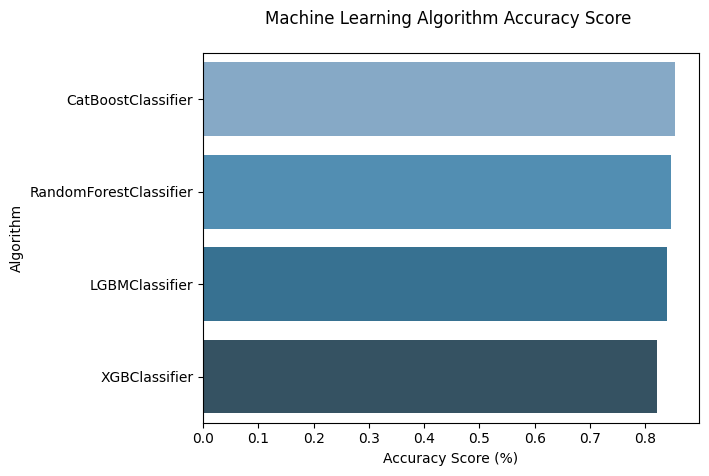

In [ ]:
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, palette = 'PuBu_d')

plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# Model Save

In [ ]:
lgbm = LGBMClassifier(verbose=0,
                      lambda_l1=0.0018135635155328029,
                      lambda_l2=1.0472462361804465e-08,
                      num_leaves=30,
                      feature_fraction=0.4025447513520281,
                      bagging_fraction=0.6475181797862417,
                      bagging_freq=3,
                      min_child_samples=13,
                      random_state=419,
                      objective='binary',
                      metric='binary_logloss',
                      boosting_type='gbdt')

lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [ ]:
import joblib
joblib.dump(lgbm, 'LGBM_model.pkl')

['LGBM_model.pkl']

In [ ]:
# 모델 불러오기
import joblib
lgbm = joblib.load('LGBM_model.pkl')